# Boosting

## Introduction

<p style="line-height:1.75;font-size:16px">
Boosting is an ensemble meta-algorithm for primarily reducing bias, and also variance in supervised learning. It does this by turning weak learners into strong learners. It's a relatively new technique which was developed in the early 90's (and there's also an Isreali connection there..)

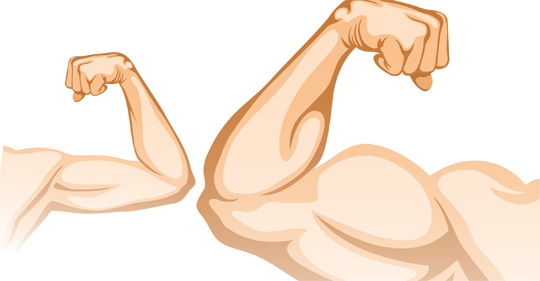

<p style="line-height:1.75;font-size:16px">
<b>Weak vs. strong learners</b><br>
A weak learner is defined to be a classifier that is only slightly correlated with the true classification (it can label examples better than random guessing). In contrast, a strong learner is a classifier that is arbitrarily well-correlated with the true classification. For example, classifier that classifies a flower based on the length of its petals might be considered a weak learner whereas a classifier that uses petal length, petal width, petal shape and color might be considered a strong learner.

<p style="line-height:1.75;font-size:16px">
<b>How does boosting convert weak learners to strong ones?</b><br>
It doesn't convert them from weak to strong per se but rather uses a combination of several weak learners to create one strong learner. It does this in a sequential manner where each new learner gives more weight or is only trained with observations that have been poorly classified by the previous learners.

<div style="line-height:1.75;background:#3464a2;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-question" style="font-size:40px;color:#e6f1ff;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#e6f1ff;padding:20px;border-radius:0px 0px 5px 5px">
What other method that we've talked about uses several learners in order to get better predictions?</p></div>

<p style="line-height:1.75;font-size:16px">
<b>Bagging - Quick Reminder</b><br>
In bagging, we used bootstrapping to generate samples, then we trained a classifier (usually a decision tree) using those samples. When we wanted to generate a prediction for a new observation we would simply get a prediction from each one of our classifiers and return a prediction based on the majority vote.

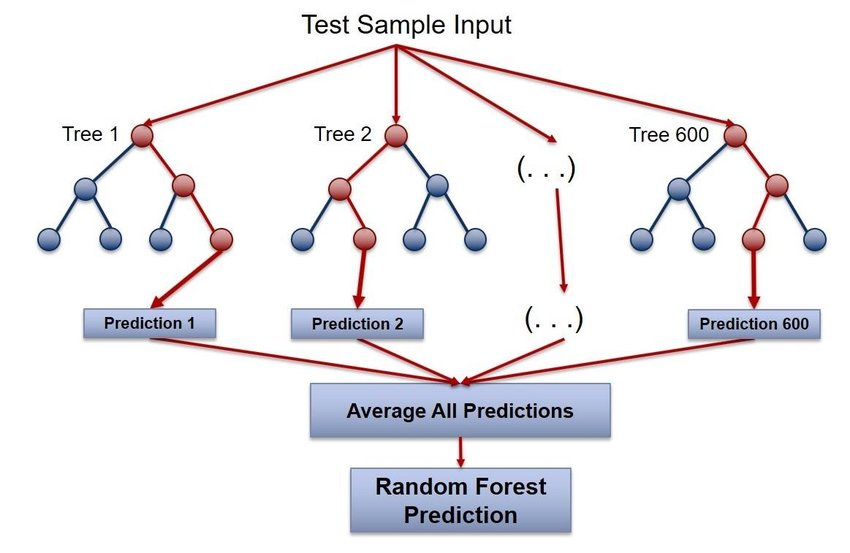

<p style="line-height:1.75;font-size:16px">
<b>Bagging vs. Boosting</b><br>
There are several differences between bagging and boosting as we will see later in this lesson but the main one is probably this: bagging works in parallel where classifiers aren't affected by one another. Boosting, on the other hand, works sequentially and each classifier is strongly affected by its predecessor. 


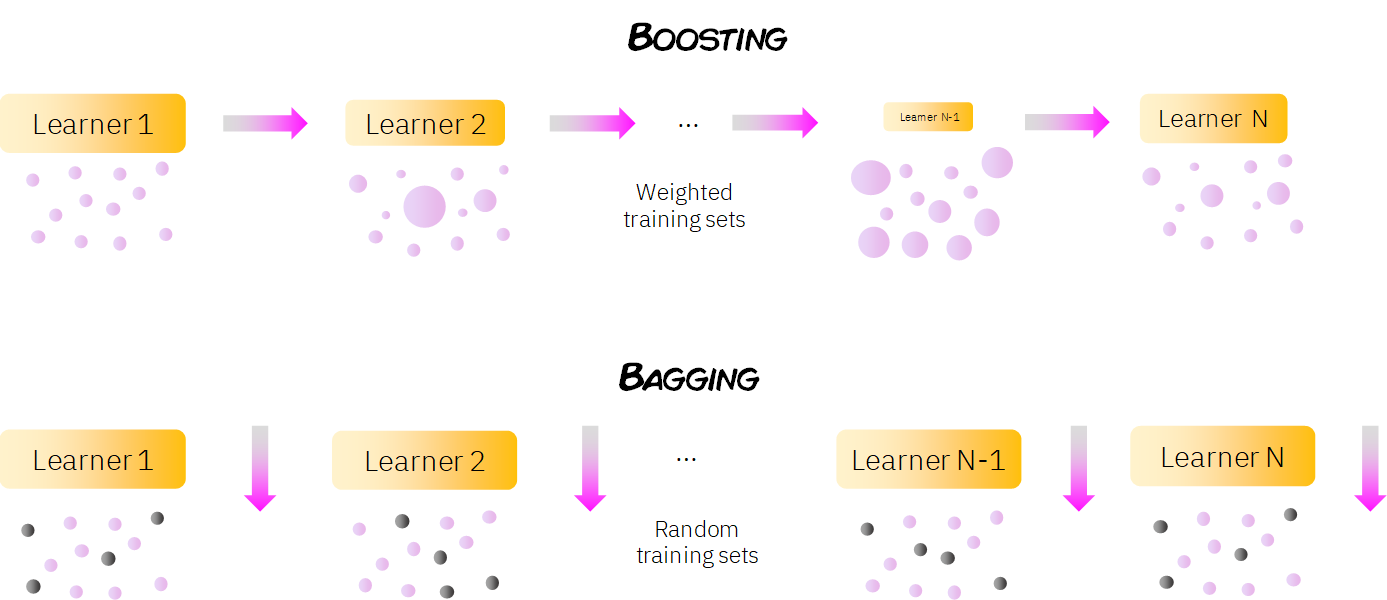

<p style="line-height:1.75;font-size:16px">
<b>Types of Boosting</b><br>
Boosting is typically divided into 2 sub-categories: adaptive boosting and gradient boosting. Adaptive boosting, aka Adaboost, and uses an exponential loss function which it tries to minimize. Gradient boosting, in contrast, can use any differentiable function.

# Adaboost

<p style="line-height:1.75;font-size:16px">
Adaboost was invented by Yoav Freund and Robert Schapire in the early 90's. It trains a set of weak learners (namely decision trees) in a sequential fashion where each learner tries to correct its predecessor's errors. Each learner is also weighted by its predictive power so some learners have a contribute more than other to the final prediction.
Let's run through a simple example to understand how it does this.

## Learn by Example

<p style="line-height:1.75;font-size:16px">
Let's revisit a previous example we used with decision trees and that is the heart disease dataset where our goal is to predict if a person has a heart disease. Here's the data we have:

In [4]:
import pandas as pd

heart_disease = pd.read_csv('./data/heart_disease_example.csv')
heart_disease

,Chest Pain,Blocked Arteries,Patient Weight,Heart Disease
0,True,True,205,True
1,False,True,180,True
2,True,False,210,True
3,True,True,167,True
4,False,True,156,False
5,False,True,125,False
6,True,False,168,False
7,True,True,172,False


<p style="line-height:1.75;font-size:16px">
We'll start by adding another column, called sample weight, which will indicate how important it is that we correclty classify this observation. We start with equal importance for each of our observations which in our case is $\frac{1}{8}$.

In [5]:
heart_disease['Sample Weight'] = 1/8
heart_disease

,Chest Pain,Blocked Arteries,Patient Weight,Heart Disease,Sample Weight
0,True,True,205,True,0.125
1,False,True,180,True,0.125
2,True,False,210,True,0.125
3,True,True,167,True,0.125
4,False,True,156,False,0.125
5,False,True,125,False,0.125
6,True,False,168,False,0.125
7,True,True,172,False,0.125


<p style="line-height:1.75;font-size:16px"> 
Ok, now we need to start building our first classifier. To do this, we need to find the feature that best predicts heart disease (similar to what we did with decision trees). Since the sample weights are equal we'll ignore them for now. We'll start by looking at chest pain and how good it is at predicting heart disease.

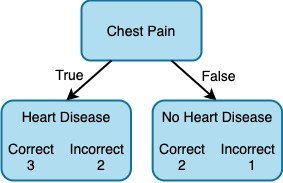

<p style="line-height:1.75;font-size:16px"> 
And we'll do the same for blocked arteries and patient weight.

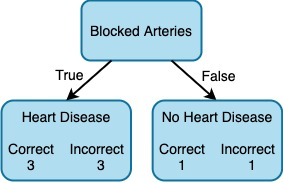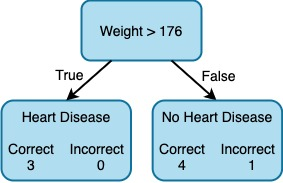

<p style="line-height:1.75;font-size:16px"> 
We also need to calculate the Gini index for each of these trees (stumps):

<center><h3>
$Gini_{chest~pain}=0.47$<p>
<center>
$Gini_{blocked~arteries}=0.5$<p>
<center>
$Gini_{weight~>~176}=0.2$<p>
</h3>
</center>

<p style="line-height:1.75;font-size:16px"> 
Since the patient weight had the lowest Gini index, it will be the one we use first. We now need to determine how much say this stump will have in the final classification. We can do this by examining how well it performed on the current samples with a measurement called <b>total error</b>. The total error is simply the sum of the weights (sample weights) associated with incorrectly classified samples. Notice that the total error will always be between 0 and 1.<br>
In our example, there is only 1 incorrect classification and it has a sample weight of $\frac{1}{8}$ so that's our total error.<br>
We then use the following formulas to calculate the <b>amount of say</b> (influence) a stump has:
<center><h3>
$Amount~of~Say=\frac{1}{2}log(\frac{1-Total~Error}{Total~Error})$<p>
</h3>
</center>
<p style="line-height:1.75;font-size:16px"> 
In our case:
<center><h3>
$Amount~of~Say=\frac{1}{2}log(\frac{1-\frac{1}{8}}{\frac{1}{8}})=\frac{1}{2}log(7)=0.97$<p>
</h3>
</center>

<p style="line-height:1.75;font-size:16px"> 
<b>Amount of Say</b>

<p style="line-height:1.75;font-size:16px"> 
Let's plot the amount of say function to get a better feel for what it does.

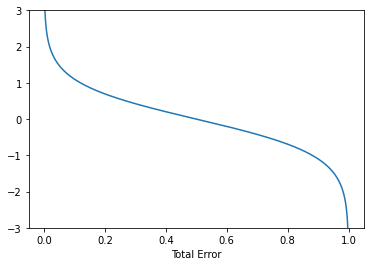

In [32]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

e = 1e-10
x = np.linspace(0,1, 100000)
y = 0.5 * np.log((1-x+e)/(x+e))
plt.ylim(-3,3)
plt.xlabel('Total Error')
plt.plot(x, y)
plt.show()

<p style="line-height:1.75;font-size:16px"> 
A few things we can say by looking at this:<br>
1\. A classifier that has very little erorr will get a high positive number which means he'll have a lot of say.<br>
2\. A classifier that if 50% wrong (no better than flipping a coin) will get a say of 0.<br>
3\. A classiifer that has a very high error and consistently predicts the opposite will get a very high negative number.

<p style="line-height:1.75;font-size:16px">
<b>Back to the example</b><br>
Now that we know how the sample weight affects the amount of say of the classifier, let's see how we update this weight and how it affects the next classifier in line. Recall that our current stump of <i><b>patient weight > 176</b></i> incorrectly classified 1 sample. What we'd like to do is to increase the weight of this sample and decrease the weight of the other samples (weight has to sum to 1) so that the next stump will know it's more important to classify this sample correctly than it is to classify the other ones.<br>
Here's the formula that we'll use to <b>increase</b> the weight of the incorrectly classified sample:

<center><h3>
$New~Sample~Weight=Current~Sample~Weight\times e^{Amount~of~Say}$<p>
</h3>
</center>

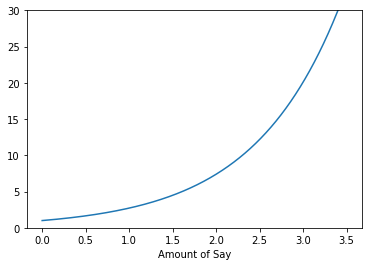

In [34]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

e = 1e-10
x = np.linspace(0, 3.5, 100000)
y = np.exp(x)
plt.ylim(0,30)
plt.plot(x, y)
plt.xlabel('Amount of Say')
plt.show()

<p style="line-height:1.75;font-size:16px">
Notice that a stump that did a good job in classification (large amount of say) then the previous sample weight will be scaled by a large number whereas a stump the did a bad job will cause the sample weight to be scaled by a small number. 

<p style="line-height:1.75;font-size:16px">
Let's plug in the numbers for our current stump:
<center><h3>
$New~Sample~Weight=Current~Sample~Weight\times e^{Amount~of~Say}=\frac{1}{8}\times e^{0.97}=0.33$<p>
</h3>
</center>
<p style="line-height:1.75;font-size:16px">
Now, we need to decrease the sample weights of the samples that were correctly classified. The formula we'll use is almost identical to the previous one, only this time we'll use the negative amount of say:
<center><h3>
$New~Sample~Weight=Current~Sample~Weight\times e^{-Amount~of~Say}$<p>
</h3>
</center>

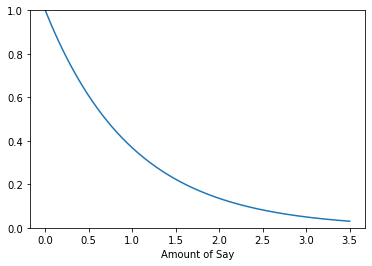

In [37]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

e = 1e-10
x = np.linspace(0, 3.5, 100000)
y = np.exp(-x)
plt.ylim(0,1)
plt.plot(x, y)
plt.xlabel('Amount of Say')
plt.show()

<p style="line-height:1.75;font-size:16px">
If the amount of say of the stump was large, we'll scale the sample weight a number close to 0 and if the amount of say was small we'd scale the sample weight by a number close to 1.

<p style="line-height:1.75;font-size:16px">
Let's plug in the numbers for our current stump:
<center><h3>
$New~Sample~Weight=Current~Sample~Weight\times e^{-Amount~of~Say}=\frac{1}{8}\times e^{-0.97}=0.05$<p>
</h3>
</center>
<p style="line-height:1.75;font-size:16px">
Now, that we have all of the values for the new sample weights, let's put the back into our table.

In [48]:
heart_disease['Sample Weight'] = 0.05
heart_disease.iloc[3, 4] = 0.33
heart_disease

,Chest Pain,Blocked Arteries,Patient Weight,Heart Disease,Sample Weight
0,True,True,205,True,0.05
1,False,True,180,True,0.05
2,True,False,210,True,0.05
3,True,True,167,True,0.33
4,False,True,156,False,0.05
5,False,True,125,False,0.05
6,True,False,168,False,0.05
7,True,True,172,False,0.05


<p style="line-height:1.75;font-size:16px">
We also need to normalize our sample weights so that they'll sum up to 1:

In [49]:
heart_disease['Sample Weight'] /= heart_disease['Sample Weight'].sum()
heart_disease

,Chest Pain,Blocked Arteries,Patient Weight,Heart Disease,Sample Weight
0,True,True,205,True,0.073529
1,False,True,180,True,0.073529
2,True,False,210,True,0.073529
3,True,True,167,True,0.485294
4,False,True,156,False,0.073529
5,False,True,125,False,0.073529
6,True,False,168,False,0.073529
7,True,True,172,False,0.073529


<p style="line-height:1.75;font-size:16px">
Our first stump is ready and it's time to build another one. We could start the process again and calculate a weighted Gini index but there's another option - resample the data based on the sample weights. We could simply generate a random number between 0 and 1 and see where if falls in terms of cumulative sample weight. Let's look at an example:<br>
Say we generated a random value of 0.05. This number is between 0 and 0.073529 so we'll choose the first sample and insert it into our new dataset. Then we generate another random number, let's say 0.51, this number is between $3\cdot 0.073529=0.2205$  and $0.2205 + 0.485294=0.7058$ so we'll take the the fourth sample and put it into our dataset. We continue with this process until our new dataset is the same size as the original one.

<div style="line-height:1.75;background:#3464a2;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-question" style="font-size:40px;color:#e6f1ff;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#e6f1ff;padding:20px;border-radius:0px 0px 5px 5px">
How does the resampling technique give more weight to the samples that were incorrectly classified?</p></div>

<p style="line-height:1.75;font-size:16px">
Since we're sampling with replacement, we can (and should) select certain samples several times. The chance of selecting a misclassified sample is higher since it has a larger weight and covers a larger portion of the probability distribution. For the sake of completeness let's finish resampling our data.

In [61]:
heart_disease = heart_disease.sample(frac=1, weights=heart_disease['Sample Weight'], replace=True)
heart_disease

,Chest Pain,Blocked Arteries,Patient Weight,Heart Disease,Sample Weight
3,True,True,167,True,0.125
1,False,True,180,True,0.125
3,True,True,167,True,0.125
1,False,True,180,True,0.125
7,True,True,172,False,0.125
3,True,True,167,True,0.125
3,True,True,167,True,0.125
7,True,True,172,False,0.125


<p style="line-height:1.75;font-size:16px">
All that's left is to adjust the sample weights and we're ready for the next iteration. Since we've already accounted for the large sample weights by the way we created the new dataset, we can simply set all the weights to be equal.

In [60]:
heart_disease['Sample Weight'] = 1/8
heart_disease

,Chest Pain,Blocked Arteries,Patient Weight,Heart Disease,Sample Weight
1,False,True,180,True,0.125
3,True,True,167,True,0.125
3,True,True,167,True,0.125
1,False,True,180,True,0.125
7,True,True,172,False,0.125
3,True,True,167,True,0.125
2,True,False,210,True,0.125
7,True,True,172,False,0.125


<div style="line-height:1.75;background:#3464a2;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-question" style="font-size:40px;color:#e6f1ff;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#e6f1ff;padding:20px;border-radius:0px 0px 5px 5px">
After we've repeated this process a few time and we have many stumps, how do we generate a prediction?</p></div>

<p style="line-height:1.75;font-size:16px">
We simply use the amount of say we calculated for each stump earlier and sum them up. For example:
<table>
<tr>
    <th>
    Stump
    </th>
    <th>
    Amount of Say
    </th>
    <th>
    Prediction
    </th>
</tr>
<tr>
    <td>
    1
    </td>
    <td>
    0.5
    </td>
    <td>
    True
    </td>
</tr>
<tr>
    <td>
    2
    </td>
    <td>
    0.1
    </td>
    <td>
    True
    </td>
</tr>
<tr>
    <td>
    3
    </td>
    <td>
    0.33
    </td>
    <td>
    False
    </td>
</tr>
<tr>
    <td>
    4
    </td>
    <td>
    0.66
    </td>
    <td>
    False
    </td>
</tr>
<tr>
    <td>
    5
    </td>
    <td>
    0.42
    </td>
    <td>
    True
    </td>
</tr>
</table>
<p>
<p style="line-height:1.75;font-size:16px">
$True = 0.5 + 0.1 + 0.42 = 1.02$<br>
$False = 0.33 + 0.66 = 0.99$<br>
<p style="line-height:1.75;font-size:16px">
Therefore we'll predict True.

## Adaboost in SKLearn


<p style="line-height:1.75;font-size:16px">
Adaboost has an implementation in sklearn which you can import like this:<br>
`from sklearn.ensemble import AdaBoostClassifier`<br>
Important parameters:<br>
1\. `base_estimator` - what's the base classifier that the boosting will be applied to.<br>
2\. `n_estimators` - how many estimators (base classifiers) to use.<br>
3\. `learning_rate` - shrinks the contribution of each estimator (helps reduce overfitting).

<div style="line-height:1.75;background:#1e7b1e;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px"><i class="fa fa-pencil" style="font-size:40px;color:#c1f0c1;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#c1f0c1;padding:20px;border-radius:0px 0px 5px 5px">
Use Adaboost on the iris dataset to classify types of iris flowers. Try playing with the paramaters discussed aboved and see how it affects your results.</p>
</div>

## Pros & Cons

<p style="line-height:1.75;font-size:16px">
<b>Pros</b><br>
1\. Less prone to overfitting.<br>
2\. Easy to understand and implement.<br>
3\. Small number of parameters.<br>
<p style="line-height:1.75;font-size:16px">
<b>Cons</b><br>
1\. Sensitive to noise in data and outliers.<br>
2\. Slower compared to other boosted classifiers.